In [1]:
# Install Kaggle API
!pip install kaggle

# Make a directory for the Kaggle API credentials
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the ~/.kaggle directory
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Verify that the Kaggle API is working
!kaggle datasets list

# Download the dataset
!kaggle datasets download -d jeffheaton/glasses-or-no-glasses

# Unzip the dataset
!unzip glasses-or-no-glasses.zip -d ./glasses-or-no-glasses


Streaming output truncated to the last 5000 lines.
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1000.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1001.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1002.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1003.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1004.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1005.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1006.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1007.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1008.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/faces-spring-2020/face-1009.png  
  inflating: ./glasses-or-no-glasses/faces-spring-2020/face

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
# List the contents of the main directory
main_dir = './glasses-or-no-glasses'
print(os.listdir(main_dir))


['train.csv', 'test.csv', 'faces-spring-2020']


In [12]:
train_data = pd.read_csv('./glasses-or-no-glasses/train.csv')
train_data.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,...,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,...,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,...,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,...,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,...,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


From The output above , you can see that the features have already been extracted from the images .

In [5]:
# Path to the directory containing images
image_dir = './glasses-or-no-glasses/faces-spring-2020'

# List the contents of the image directory
print(os.listdir(image_dir))

['faces-spring-2020']


In [6]:
from PIL import Image

In [13]:

train_data.isnull().sum()

id         0
v1         0
v2         0
v3         0
v4         0
          ..
v509       0
v510       0
v511       0
v512       0
glasses    0
Length: 514, dtype: int64

The training data has no null values

##Data Exploration

In [14]:
# check the data type
# check its unique values
print(train_data['glasses'].dtypes)
print(train_data['glasses'].unique())

int64
[0 1]


##Observations
1.)The glasses column has the correct data type

2.) There are just two distinct values in the target column,which means that they are properly encoded

In [15]:
print(train_data['glasses'].value_counts())

glasses
1    2856
0    1644
Name: count, dtype: int64


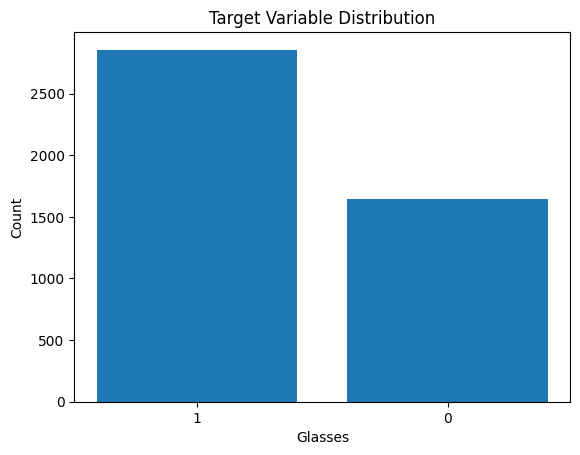

In [18]:
values, counts = train_data['glasses'].value_counts().index, train_data['glasses'].value_counts().values

# Plot the bar chart
plt.bar(range(len(values)), counts, align='center')
plt.xticks(range(len(values)), values)
plt.xlabel('Glasses')
plt.ylabel('Count')
plt.title('Target Variable Distribution')
plt.show()

The target column exhibits a class imbalance, with the 'glasses' class having approximately 1.74 times more samples than the 'no-glasses' class. This imbalance may potentially introduce bias in machine learning algorithms, which could impact model performance and accuracy.

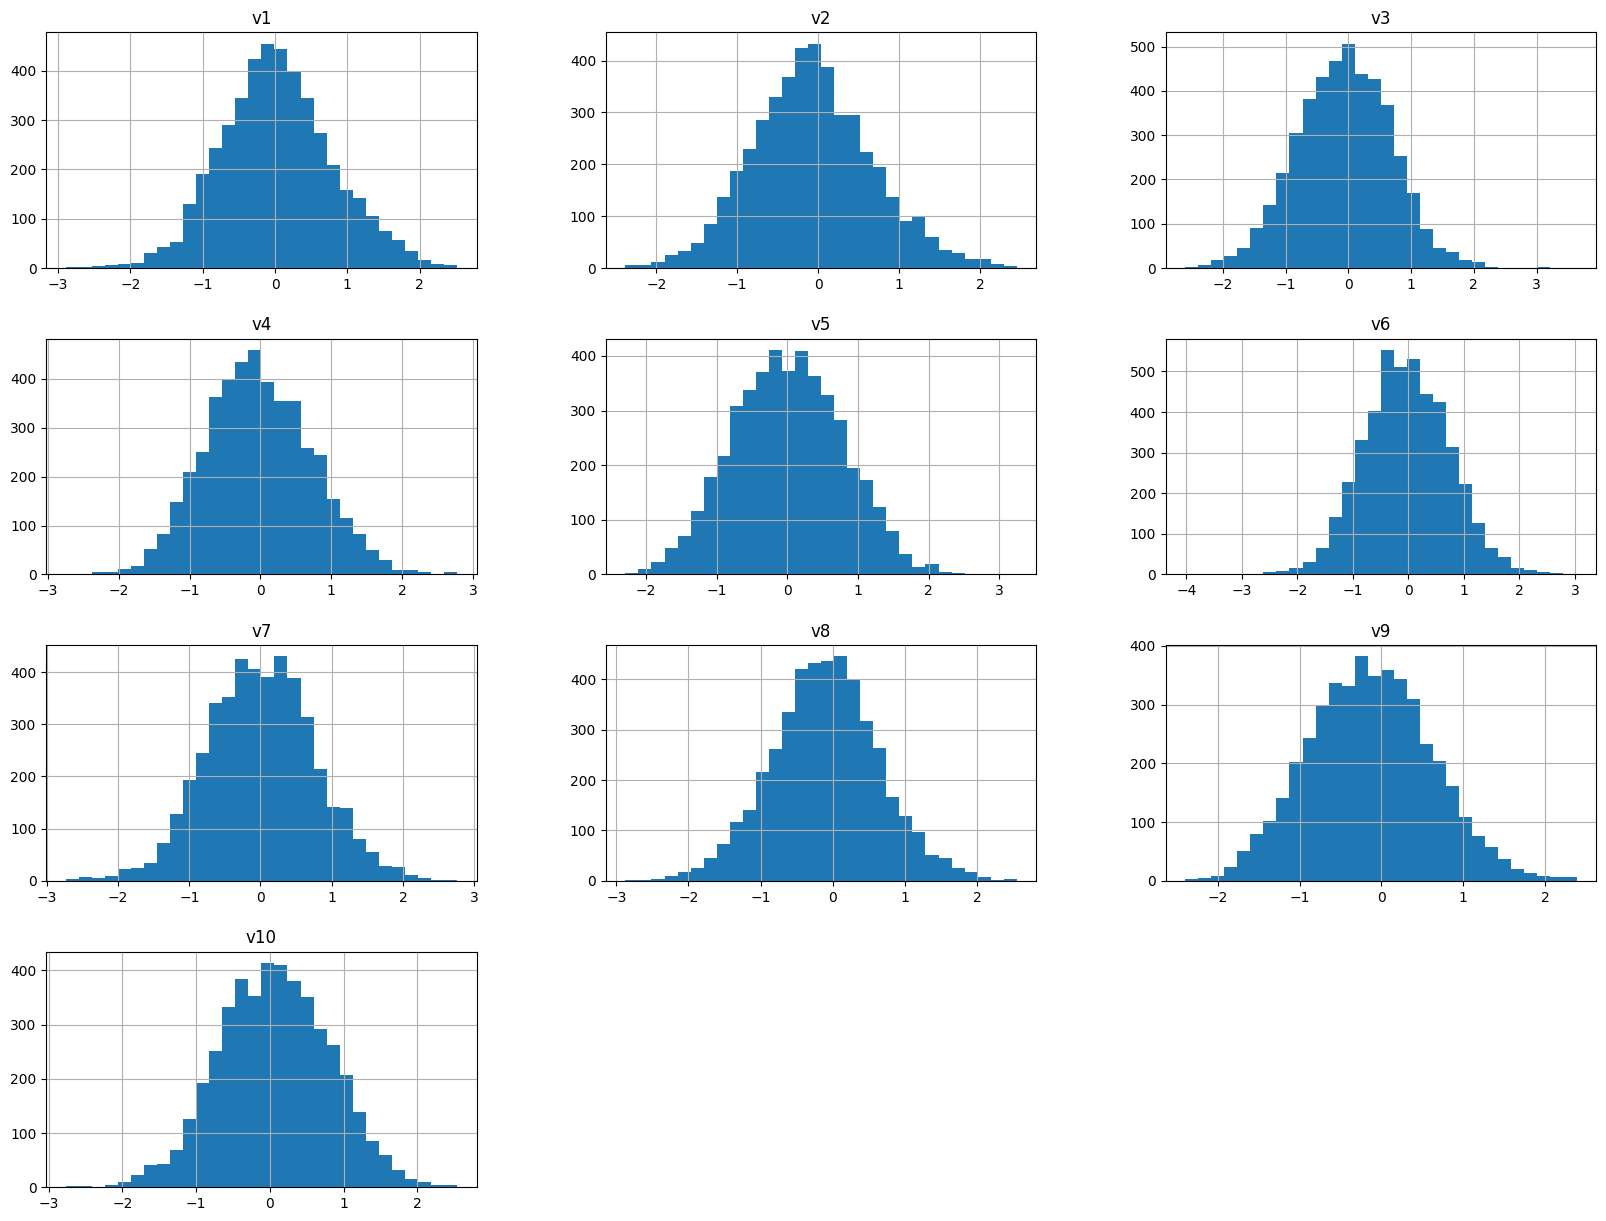

In [45]:
selected_columns = ['v1', 'v2', 'v3', 'v4', 'v5','v6','v7','v8','v9','v10']  # Add more as needed
train_data[selected_columns].hist(bins=30, figsize=(20, 15))
plt.show()

In [21]:
pip install lazypredict


In [35]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
X = train_data.drop(columns=['glasses'])
y = train_data['glasses']

In [39]:
X.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,1,0.38,-0.95,0.01,0.18,0.38,0.64,0.14,-0.26,-0.39,...,0.68,-0.03,1.32,-0.95,0.02,-1.24,0.44,1.09,1.69,0.62
1,2,0.08,-0.10,0.40,-0.39,0.11,0.53,0.07,0.34,0.70,...,-0.55,0.87,-1.25,-0.22,-1.54,1.05,-1.24,0.01,-1.28,-0.60
2,3,1.19,-0.69,-0.68,-0.36,-0.61,-0.40,1.45,0.01,1.69,...,-0.35,-0.36,0.02,0.32,-0.35,-0.42,-0.58,-0.60,0.44,0.42
3,4,1.35,-0.31,-1.30,0.50,1.66,-1.06,-0.71,-0.24,-0.16,...,1.18,0.24,0.21,0.82,-0.75,-0.63,0.02,0.84,-0.47,0.07
4,5,-0.04,-0.34,0.14,1.51,-0.14,0.49,0.08,-0.04,0.42,...,-1.61,-1.78,0.07,1.50,-0.41,-0.56,-0.30,0.84,0.60,-0.20


In [40]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: glasses, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the results
print(models)

 97%|█████████▋| 28/29 [01:48<00:05,  5.02s/it]

[LightGBM] [Info] Number of positive: 2279, number of negative: 1321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 130815
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 513
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633056 -> initscore=0.545348
[LightGBM] [Info] Start training from score 0.545348


100%|██████████| 29/29 [02:02<00:00,  4.24s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
NuSVC                              1.00               1.00     1.00      1.00   
CalibratedClassifierCV             1.00               1.00     1.00      1.00   
LinearSVC                          1.00               1.00     1.00      1.00   
LogisticRegression                 1.00               0.99     0.99      1.00   
PassiveAggressiveClassifier        1.00               0.99     0.99      1.00   
Perceptron                         0.99               0.99     0.99      0.99   
KNeighborsClassifier               0.99               0.99     0.99      0.99   
RidgeClassifierCV                  0.99               0.98     0.98      0.99   
RidgeClassifier             

Key Observations

Models like SVC, QuadraticDiscriminantAnalysis, NuSVC, and CalibratedClassifierCV achieved perfect scores (1.00) across accuracy, balanced accuracy, ROC AUC, and F1 score. This suggests these models performed exceptionally well on the  dataset.

LabelSpreading, LabelPropagation, and DummyClassifier had the lowest performance, indicating they are  not be suitable.

Time Taken varies significantly across models, with some like BaggingClassifier and AdaBoostClassifier taking much longer than others like NearestCentroid and DummyClassifier.

### Building the model

In [49]:
#importing the necessary libraries
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [50]:
svc_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVC model on the training data
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [51]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Train the XGBoost classifier on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Evaluating the baseline model

In [52]:
# Evaluate SVC model
svc_accuracy = svc_model.score(X_test, y_test)
print("SVC Accuracy:", svc_accuracy)

# Evaluate XGBoost model
xgb_accuracy = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgb_accuracy)

SVC Accuracy: 0.9944444444444445
XGBoost Accuracy: 0.9488888888888889


In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
# Make predictions using SVC model
svc_predictions = svc_model.predict(X_test)
print("SVC Predictions:\n", svc_predictions)

# Make predictions using XGBoost model
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Predictions:\n", xgb_predictions)


SVC Predictions:
 [1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 0 0 0 

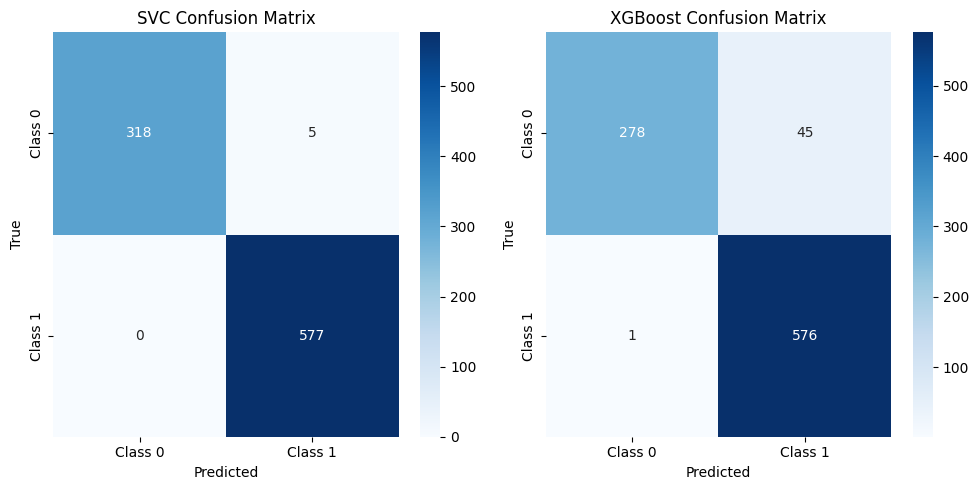

In [56]:


# Compute confusion matrix for SVC
svc_cm = confusion_matrix(y_test, svc_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix for SVC
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot confusion matrix for XGBoost
plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


From the Confusion matrix above , we can see that the SVC model outperforms the XGBoost. It's true positives and True negatives is almost 100 % correct

In [57]:


# Calculate precision, recall, and F1 score for SVC
svc_report = classification_report(y_test, svc_predictions)
print("SVC Classification Report:\n", svc_report)

# Calculate precision, recall, and F1 score for XGBoost
xgb_report = classification_report(y_test, xgb_predictions)
print("XGBoost Classification Report:\n", xgb_report)


SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       323
           1       0.99      1.00      1.00       577

    accuracy                           0.99       900
   macro avg       1.00      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       323
           1       0.93      1.00      0.96       577

    accuracy                           0.95       900
   macro avg       0.96      0.93      0.94       900
weighted avg       0.95      0.95      0.95       900



Predictions on new data

In [58]:
test_data = pd.read_csv('glasses-or-no-glasses/test.csv')
test_data.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512
0,4501,0.48,-0.32,-0.44,0.30,-0.77,-0.57,0.04,0.49,-0.64,...,-0.44,-0.20,0.13,-0.14,-0.46,0.02,0.30,-0.65,-0.26,0.52
1,4502,1.65,-0.40,-0.87,-0.33,1.47,-0.49,-0.20,0.79,-0.02,...,-0.59,-0.16,0.55,0.70,-1.40,0.44,0.58,-0.45,0.40,1.45
2,4503,0.67,-0.89,-1.04,0.51,-0.94,0.70,-1.96,-0.37,-0.81,...,-0.45,0.46,0.61,0.02,0.71,-0.70,-1.68,1.34,-0.04,1.13
3,4504,0.07,-1.13,-1.14,0.75,-0.85,-0.11,-1.23,0.23,-0.38,...,-0.43,-0.34,0.80,0.68,0.18,-0.85,-0.17,0.08,-0.01,0.71
4,4505,0.15,-0.06,-0.58,0.16,1.49,0.18,0.04,-0.00,-1.27,...,-0.34,-0.24,0.18,-0.26,-0.48,-0.74,0.21,-1.09,-0.91,-0.38


In [60]:
svc_prediction = svc_model.predict(test_data)
print("SVC Predictions:\n", svc_prediction)

SVC Predictions:
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 

In [61]:
# saving the svc model
import joblib





In [62]:


# Save the  SVC model to disk
joblib.dump(svc_model, 'svc_model.pkl')

# Load the model from disk
loaded_model = joblib.load('svc_model.pkl')

# Make predictions using loaded model
predictions = loaded_model.predict(test_data)
